In [0]:
import yfinance as yf 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

train_data = pd.DataFrame(yf.download("GOOG", start="2013-01-01", end="2018-12-31"))
test_data= pd.DataFrame(yf.download("GOOG", start="2019-01-01", end="2019-12-31"))

Using TensorFlow backend.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
print(train_data.shape)
train_data.head()

(1509, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,358.366760,362.142609,356.937103,360.274597,360.274597,5101500
2013-01-03,361.111481,364.598389,359.014313,360.483826,360.483826,4653700
2013-01-04,363.308228,369.350586,362.481323,367.607117,367.607117,5547600
2013-01-07,366.351837,368.309479,363.925903,366.003143,366.003143,3323800
2013-01-08,366.396667,366.775238,360.862396,365.280823,365.280823,3364700


In [0]:
print(test_data.shape)
test_data.head()

(251, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [0]:
#we take only Opening stock values 
train_data=np.array(train_data['Open'])
test_data=np.array(test_data['Open'])

In [0]:
train_data=train_data.reshape((-1,1))
test_data=test_data.reshape((-1,1))

In [0]:
#Normalizing data in range 0 and 1
scaler=MinMaxScaler()

In [0]:
scaled_train_data=scaler.fit_transform(train_data)
scaled_train_data

array([[0.00799192],
       [0.01097535],
       [0.01336316],
       ...,
       [0.69348437],
       [0.72407182],
       [0.75936582]])

In [0]:
#creating data loaders with 50 time steps and output label after 5 steps
x_train=[]
y_train=[]

for i in range(50,len(scaled_train_data)):
  x_train.append(scaled_train_data[i-50:i])
  y_train.append(scaled_train_data[i])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [0]:
#creating a sequential model
model=Sequential()


In [0]:
#adding LSTM layers and regularize at dropout rate-0.3
#layer -1
model.add(LSTM(units=60,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#layer -2
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

#layer -3
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

#layer -4
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

#layer -6
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

#layer -6
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

#layer -7
model.add(LSTM(units=60))
model.add(Dropout(0.2))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Dense(units=1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1459/1459 [==============================] - 21s 14ms/step - loss: 0.0339
Epoch 2/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0043
Epoch 3/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0040
Epoch 4/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0054
Epoch 5/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0046
Epoch 6/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0033
Epoch 7/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0040
Epoch 8/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0034
Epoch 9/100
1459/1459 [==============================] - 15s 11ms/step - loss: 0.0040
Epoch 10/100
1459/1459 [==============================] - 15s 10ms/step - loss: 0.0036
Epoch 11/100
1459/1459 [=============

In [0]:
scaled_test_data=scaler.fit_transform(test_data)
x_test=[]
for i in range(50,len(test_data)):
  x_test.append(scaled_test_data[i-50:i])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
target_price=model.predict(x_test)

In [0]:
predicted_prices=[]
inverse_transformed_price=scaler.inverse_transform(target_price)
for i in inverse_transformed_price:
  for j in i:
    predicted_prices.append(j)

In [0]:
test_data=list(test_data[50:])
timestamp=[i for i in range(len(test_data))]

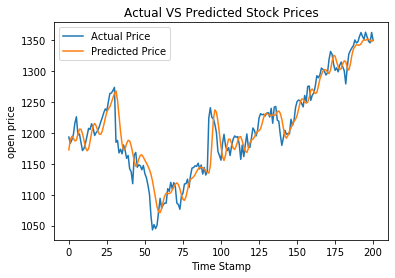

In [0]:
plt.plot(timestamp,test_data)
plt.plot(timestamp,predicted_prices)
plt.title('Actual VS Predicted Stock Prices')
plt.ylabel('open price')
plt.xlabel('Time Stamp')
plt.legend(loc='best',labels=['Actual Price','Predicted Price'])
plt.show()